In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
PATH = 'drive/My Drive/DataWhale-零基础入门NLP - 新闻文本分类'
%cd drive/My Drive/DataWhale-零基础入门NLP - 新闻文本分类

[Errno 2] No such file or directory: 'drive/My Drive/DataWhale-零基础入门NLP - 新闻文本分类'
/content/drive/My Drive/DataWhale-零基础入门NLP - 新闻文本分类


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

SEED = 2020

In [13]:
train_df = pd.read_csv('train_set.csv',sep='\t',nrows=100000)
test_df = pd.read_csv('test_a.csv',sep='\t')
sub_df = pd.read_csv('test_a_sample_submit.csv',sep='\t')

In [17]:
train_X,valid_X,train_y,valid_y = train_test_split(train_df['text'],train_df['label'],train_size=0.8,random_state=SEED)

In [18]:
train_X.shape

(80000,)

In [20]:
vectorizer = CountVectorizer(max_features=10000)
train_val = vectorizer.fit_transform(train_df['text'])

In [25]:
clf = LogisticRegression(penalty='l2',solver='sag',class_weight='balanced',multi_class='multinomial',n_jobs=-1)
clf.fit(train_val[:80000], train_df['label'].values[:80000])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=-1,
                   penalty='l2', random_state=None, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

In [28]:
val_pred_count = clf.predict(train_val[80000:])
print(f1_score(train_df['label'].values[80000:], val_pred_count, average='macro'))
# target_names = ['class 0', 'class 1', 'class 2']


0.7435703966881524


In [37]:
print(classification_report(train_df['label'].values[80000:], val_pred_count)) 

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      3935
           1       0.88      0.77      0.82      3670
           2       0.97      0.92      0.95      3109
           3       0.88      0.79      0.83      2260
           4       0.70      0.79      0.74      1573
           5       0.65      0.86      0.74      1270
           6       0.85      0.90      0.88       966
           7       0.62      0.85      0.72       835
           8       0.76      0.50      0.61       781
           9       0.67      0.86      0.76       555
          10       0.56      0.89      0.69       473
          11       0.48      0.83      0.61       288
          12       0.64      0.89      0.74       198
          13       0.37      0.92      0.53        87

    accuracy                           0.80     20000
   macro avg       0.71      0.82      0.74     20000
weighted avg       0.83      0.80      0.81     20000



## TF-IDF Features

In [31]:
tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=10000)
train_val = tfidf.fit_transform(train_df['text'])

In [ ]:
clf = LogisticRegression(penalty='l2',solver='sag',class_weight='balanced',multi_class='multinomial',n_jobs=-1)
clf.fit(train_val[:80000], train_df['label'].values[:80000])

In [33]:
val_pred_tfidf = clf.predict(train_val[80000:])
print(f1_score(train_df['label'].values[80000:], val_pred_tfidf, average='macro'))

0.898842235741962


In [36]:
print(classification_report(train_df['label'].values[80000:], val_pred_tfidf)) 

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      3935
           1       0.95      0.91      0.93      3670
           2       0.98      0.97      0.98      3109
           3       0.95      0.94      0.94      2260
           4       0.86      0.92      0.89      1573
           5       0.85      0.90      0.87      1270
           6       0.93      0.92      0.93       966
           7       0.80      0.91      0.85       835
           8       0.90      0.91      0.90       781
           9       0.84      0.95      0.89       555
          10       0.88      0.93      0.91       473
          11       0.75      0.91      0.82       288
          12       0.87      0.95      0.91       198
          13       0.72      0.97      0.83        87

    accuracy                           0.92     20000
   macro avg       0.88      0.93      0.90     20000
weighted avg       0.93      0.92      0.92     20000



In [40]:
scores = cross_val_score(clf, train_val[80000:] , train_df['label'].values[80000:], cv=5)
scores.mean()

0.90625

In [42]:
test_df.head()

,text
0,5399 3117 1070 4321 4568 2621 5466 3772 4516 2...
1,2491 4109 1757 7539 648 3695 3038 4490 23 7019...
2,2673 5076 6835 2835 5948 5677 3247 4124 2465 5...
3,4562 4893 2210 4761 3659 1324 2595 5949 4583 2...
4,4269 7134 2614 1724 4464 1324 3370 3370 2106 2...


In [46]:
sub_df_X = tfidf.transform(test_df['text'])
pred_y = clf.predict(sub_df_X)
sub_df['label'] = pred_y

In [47]:
sub_df.head()

,label
0,1
1,2
2,8
3,5
4,0


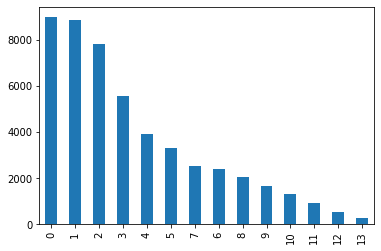

In [50]:
sub_df['label'].value_counts().plot(kind='bar')

In [51]:
sub_df.to_csv('sub_df.csv',index=False)

In [52]:
1+1


2